In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Business Understanding

The dataset chosen is FIFA 19 and we will be trying to answer the following questions:

1) The ratio of total wage for all the players to the potential of each club and which clubs offer the least wage to players?
2) The age distribution of soccer players and their ratings compared against age.
3) Is there a relation between player's skills and their wages? Can we predict a player's potential based on their skills?

In [2]:
# load dataset
fifa19_player_df = pd.read_csv(r"C:\Users\mjv33\OneDrive\Desktop\Docs\data.csv")
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High


In [17]:
fifa19_player_df.shape[0]

18483

In [3]:
fifa19_player_df.shape[1]

87

In [4]:
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 87 columns):
Unnamed: 0                  18483 non-null int64
ID                          18483 non-null int64
Name                        18483 non-null object
Age                         18483 non-null int64
Photo                       18483 non-null object
Nationality                 18483 non-null object
Flag                        18483 non-null object
Overall                     18483 non-null int64
Potential                   18483 non-null int64
Club                        18246 non-null object
Club Logo                   18483 non-null object
Value                       18483 non-null object
Wage                        18483 non-null object
Special                     18483 non-null int64
Acceleration                18483 non-null int64
Aggression                  18483 non-null int64
Agility                     18483 non-null int64
Balance                     18483 non-null int64
B

In [5]:
fifa19_player_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

In [6]:
#missing values
fifa19_player_df.isnull().sum()

Unnamed: 0                 0
ID                         0
Name                       0
Age                        0
Photo                      0
Nationality                0
Flag                       0
Overall                    0
Potential                  0
Club                     237
Club Logo                  0
Value                      0
Wage                       0
Special                    0
Acceleration               0
Aggression                 0
Agility                    0
Balance                    0
BallControl                0
Body Type                  0
CAM                     2065
CB                      2065
CDM                     2065
CF                      2065
CM                      2065
Composure                  0
Contract Valid Until    2071
Crossing                   0
Curve                      0
Dribbling                  0
                        ... 
Penalties                  0
Position                  12
Positioning                0
Preferred Foot

# Data Preparation:
    1) Drop the columns which are not being used
    2) Convert the columns with string characters to numbers
    3) Find the columns with missing values and drop them if needed

In [7]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_player_df.drop(columns_to_drop,axis=1,inplace=True)

In [8]:
fifa19_player_df.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2195,91,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,89,...,5,23,91,88,31,79,82,87,4,High/ Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,94,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,57,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,78,...,4,51,76,90,58,75,94,82,5,High/ High


In [9]:

# Convert value/wage string to number
# Example: €110.5M -> 110.5 * 1000000
def str2number(amount):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    


In [10]:
# Convert value, wage to number
# First convert value, wage string to actual amount, then divide by 1 million and 1 k. 
fifa19_player_df['Value_M'] = fifa19_player_df['Value'].apply(lambda x: str2number(x) / 1000000)
fifa19_player_df['Wage_K'] = fifa19_player_df['Wage'].apply(lambda x: str2number(x) / 1000)

# Drop original value & wage column
fifa19_player_df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [11]:
# From below we can see that highest player value is 118.8m and wage is 565k
# Which are Neymar Jr and L. Messi respectively.
fifa19_player_df.describe()

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Value_M,Wage_K
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,...,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,25.163069,66.263053,71.339772,1597.658822,64.595304,55.780555,63.527079,63.939837,58.365146,58.648867,...,45.602608,64.707299,63.201537,47.624682,65.312666,53.400206,42.939999,2.947303,2.430337,9.794352
std,4.647483,6.905209,6.139146,272.543245,14.954584,17.377207,14.773233,14.162924,16.687703,11.389241,...,21.292184,14.696814,15.934811,21.672483,12.568578,14.138509,17.687448,0.661634,5.600717,22.045326
min,16.000000,48.000000,48.000000,738.000000,12.000000,11.000000,14.000000,16.000000,5.000000,3.000000,...,3.000000,12.000000,12.000000,2.000000,17.000000,10.000000,4.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,57.000000,44.000000,55.000000,56.000000,54.000000,51.000000,...,24.000000,57.000000,56.000000,27.000000,58.000000,44.000000,30.000000,3.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,67.000000,59.000000,66.000000,66.000000,63.000000,59.000000,...,52.000000,67.000000,66.000000,55.000000,67.000000,55.000000,44.000000,3.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1786.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,...,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000,3.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,97.000000,95.000000,96.000000,96.000000,96.000000,96.000000,...,91.000000,96.000000,96.000000,93.000000,97.000000,94.000000,90.000000,5.000000,118.500000,565.000000


In [18]:
# Missing value handling
missing_player_df = fifa19_player_df[fifa19_player_df['Agility'].isnull()]

In [19]:
missing_player_df.describe()


,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Value_M,Wage_K
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Value_M,Wage_K
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Question 1:

The ratio of total wage for all the players to the potential of each club and which clubs offer the least wage to players?

In [20]:
club_wages = fifa19_player_df.groupby('Club').sum()

In [21]:
club_player_count = fifa19_player_df.groupby('Club').count()


In [22]:
# Number of clubs and average number of players in each club
print('Number of clubs is {}'.format(club_player_count.shape[0]))
print('Average number players in each club is {}'.format(round(club_player_count['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'
      .format(round(club_wages['Wage_K'].sum() / club_wages['Potential'].sum(), 2)))

Number of clubs is 651
Average number players in each club is 28.03
Total Average wage(K) potential ratio is 0.14


In [24]:
club_wages['Wage/Potential'] = club_wages['Wage_K'] / club_wages['Potential']
club_wages['Player Number'] = club_player_count['Age']
club_wages['Player Average Age'] = club_wages['Age'] / club_wages['Player Number']

In [25]:
club_wages.sort_values('Wage/Potential', ascending=False, inplace=True)


In [26]:
club_wages.head()


,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,StandingTackle,Strength,Vision,Volleys,Weak Foot,Value_M,Wage_K,Wage/Potential,Player Number,Player Average Age
Club,,,,,,,,,,,,,,,,,,,,,
FC Barcelona,731,2373,2569,55791,2073,1761,2091,2076,2132,2162,...,1703,1965,2075,1593,99,844.600,4774.0,1.858311,30,24.366667
Real Madrid,820,2669,2887,61661,2346,2075,2324,2349,2366,2361,...,1958,2296,2107,1602,110,916.775,5220.0,1.808105,34,24.117647
Juventus,704,2132,2216,49516,1837,1741,1833,1699,1857,2017,...,1630,1891,1717,1437,84,701.975,3349.0,1.511282,26,27.076923
Manchester City,789,2529,2775,60537,2354,2061,2370,2326,2305,2317,...,1836,2167,2172,1656,104,753.205,3708.0,1.336216,33,23.909091
Manchester United,817,2551,2729,62052,2313,2298,2290,2199,2342,2378,...,1894,2336,2203,1816,107,608.250,3464.0,1.269329,33,24.757576


Text(0.5, 1.0, 'Top 10 clubs spending wage(K) on players potential')

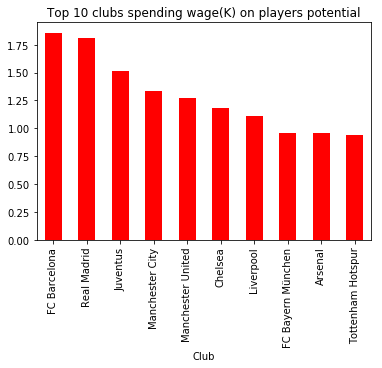

In [28]:
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Red')
plt.title('Top 10 clubs spending wage(K) on players potential')

Text(0.5, 1.0, 'Top 10 economical clubs ')

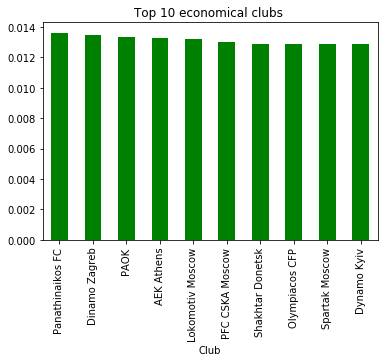

In [29]:
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='Green')
plt.title('Top 10 economical clubs ')

# Question 2:

The age distribution of soccer players and their ratings compared against age.

In [30]:
# Calculate age count
age_count = fifa19_player_df['Age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [31]:
# Calculate average overall rating
age_mean = fifa19_player_df.groupby('Age').mean()

In [32]:
# Plot age distribution and overall rating together
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

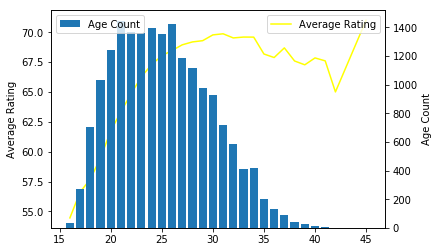

In [33]:
ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'yellow', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

# Conclusion 

From above plot, we can see that most players are between 20-26 years old. And players' number start to decrease after 26 years old and speed up after 30. Reason behind this could be that many young player didn't get enough opportunities to prove themselves and give up their dream as a football player.

When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating. The golden era of a football player starts here and ends when his age reaches 35. At this age, his physical body condition drops quickly so as average rating.

There are also quite a few numbers of players with age over 37, 38 years old. This is quite a surprise especially their rating still can remain quite high.

# Question 3:

Is there a relation between player's skills and their wages? Can we predict a player's potential based on their skills?

In [34]:
columns_to_drop_q3 = ['Name', 'Nationality', 'Club']
fifa19_player_df.drop(columns_to_drop_q3, axis=1, inplace=True)

In [35]:
# Drop the 48 players whose skill set is missing.
fifa19_player_df.dropna(axis=0, how='any', inplace=True)

In [36]:
# Here the work rate is in the format of attack work rate/defence work rate
#We will separate two skills in two different columns    

fifa19_player_df['Work Rate Attack'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_df['Work Rate Defence'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[1])
fifa19_player_df.drop('Work Rate', axis=1, inplace=True)

In [37]:
fifa19_player_df.head()

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2195,91,48,91,95,96,96,...,72,28,59,94,86,4,110.5,565.0,Medium,Medium
1,33,94,94,2228,89,63,87,70,94,95,...,88,31,79,82,87,4,77.0,405.0,High,Low
2,26,92,93,2143,94,56,96,84,95,94,...,81,24,49,87,84,5,118.5,290.0,High,Medium
3,27,91,93,1471,57,38,60,43,42,68,...,43,21,64,68,13,3,72.0,260.0,Medium,Medium
4,27,91,92,2281,78,76,79,77,91,88,...,90,58,75,94,82,5,102.0,355.0,High,High


In [38]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_df = pd.get_dummies(fifa19_player_df, columns=one_hot_columns, prefix = one_hot_columns)


In [39]:
fifa19_player_df.shape

(16412, 78)

# Model Generation

In [40]:
y = fifa19_player_df['Potential']
X = fifa19_player_df.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [41]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
ForestRegressor=RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train,y_train)
y_test_preds=ForestRegressor.predict(X_test)
print(r2_score(y_test,y_test_preds))
print(mean_squared_error(y_test,y_test_preds))

0.8682702165258129
4.858953881397238


In [43]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
6,BallControl,0.367418
0,Age,0.198679
34,StandingTackle,0.122954
27,Reactions,0.056703
24,Marking,0.026347
1,Special,0.022461
18,HeadingAccuracy,0.018643
19,Interceptions,0.016804
12,Finishing,0.014934
26,Positioning,0.012608


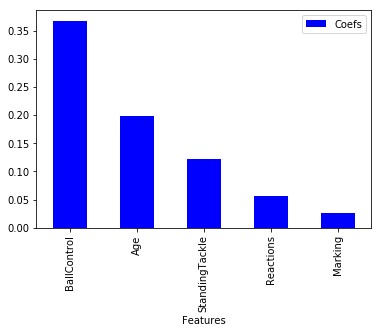

In [44]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='blue')